In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Basic Questions about the data
Given any dataset, before proceeding with any training/model-building, we need to first understand the data, the trends that it shows and the important features that we need to use to solve the problem at hand.

In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

## 1. How big is the data / What is the size (or shape) of the data

In [3]:
df.shape

(891, 12)

## 2. How does the data look like

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# df.head() gives the first 5 rows of the dataset, but sometimes this may not be a true representation of the dataset.
df.sample(5) # gives 5 random rows from the dataset, which may be a better representation

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
352,353,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,NaN,C
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S
687,688,0,3,"Dakic, Mr. Branko",male,19.0,0,0,349228,10.1708,NaN,S
563,564,0,3,"Simmons, Mr. John",male,NaN,0,0,SOTON/OQ 392082,8.0500,NaN,S


## 3. What is the data type of the columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 4. Are there any missing values

In [7]:
df.isnull().sum() # gives the total number of missing values in every column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 5. How does the data look mathematically

In [8]:
df.describe() # gives a high level mathematical summary
# However these insights are only applicable for numerical columns. As you can see, the statistics about Age give a fairly good idea about the distribution of age of the passengers. But PassengerId statistics do not convey anything since it is just a random unique identifier and not a numerical quantity.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 6. Are there duplicate values

In [9]:
df.duplicated().sum() # gives a count of duplicated rows in the dataset
# drop duplicate rows using the drop_duplicate() function

0

## 7. What is the correlation among the columns

In [10]:
# useful for numerical columns
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
df.corr(numeric_only=True)['Survived'] # gives correlation of Survived column with other columns

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

# EDA - Univariate Analysis
Uni - single, Variate - variable\
Analysis of a single variable is called univariate analysis. \
Data is generally of two major types: Numerical and Categorical. Numerical data would entail values that would span numerical values. Categorical data would have values that will be chosen from a fixed set of domain. \
Numerical: height, age \
Categorical: country, can_vote

In [12]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
576,577,1,2,"Garside, Miss. Ethel",female,34.0,0,0,243880,13.0000,NaN,S
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

## Categorical Data

First we make a note of what columns are categorical data:
- Survived
- Pclass
- Sex
- SibSp
- Parch
- Embarked

### a. Countplot
Used to plot a count of all the values for a categorical column

<Axes: xlabel='Survived', ylabel='count'>

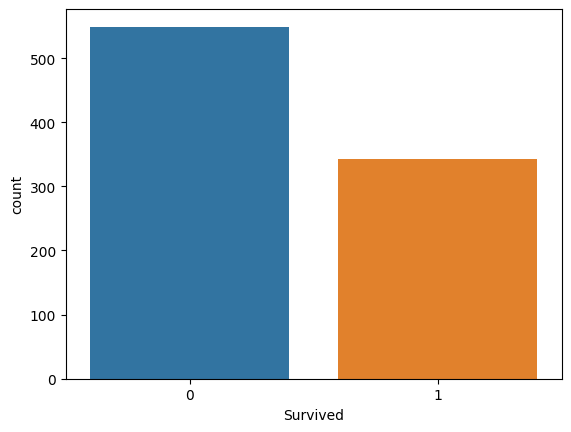

In [14]:
sns.countplot(df, x='Survived')
# sns.countplot(df, x='Pclass', hue='Survived') gives a plot of Pclass count along with the information that for each Pclass value, how many survived.

### b. Piechart

<Axes: ylabel='count'>

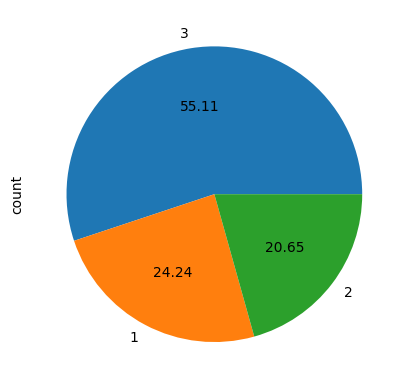

In [15]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%.2f')

## Numerical Data

In [16]:
# df.fillna({'Age': df['Age'].mean()}, inplace=True) to replace the null values with mean value

### a. Histogram
To view the distribution (or get a good idea about it) of a numerical data, a Histogram is a great tool. It creates equidistant bins among the total range of the data and displays a count of the values among the data that lie in each range. This helps us plot a rough distribution graph to gain an understanding of the type of numerical data handled.

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

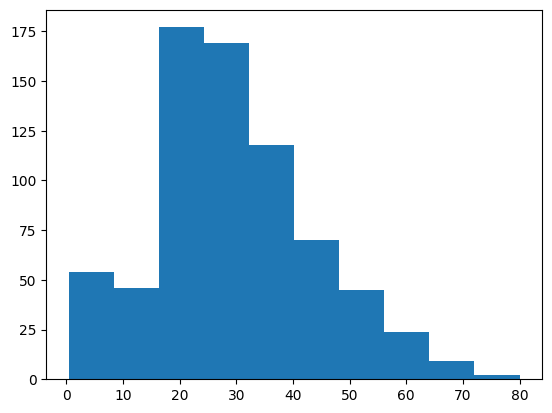

In [17]:
plt.hist(df['Age'])

### b. Distplot
An improvement on Histogram

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


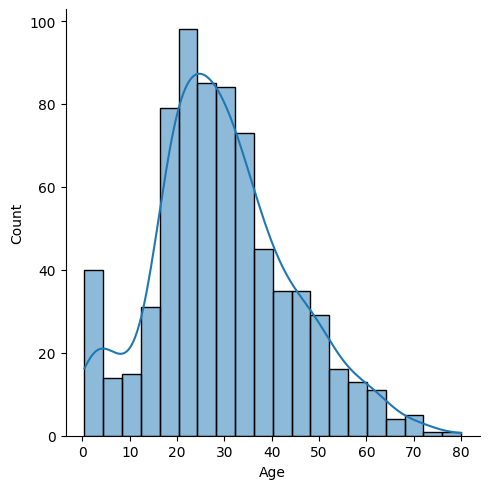

In [18]:
sns.displot(df, x='Age', kde=True)
# sns.displot(df['Age'], kind='kde')

### c. Boxplot
Gives the 5 number summary: quartile_min, 25th percentile, 50th percentile (median), 75th percentile, quartile_max \
Q1: 25th percentile \
Q3: 75th percentile \
IQR (Inter-Quartile Range): Q3-Q1 \
quartile_min: Q1-1.5\*IQR \
quartile_max: Q3+1.5\*IQR \
Outliers lie outside the quartile_min, quartile_max

<Axes: xlabel='Age'>

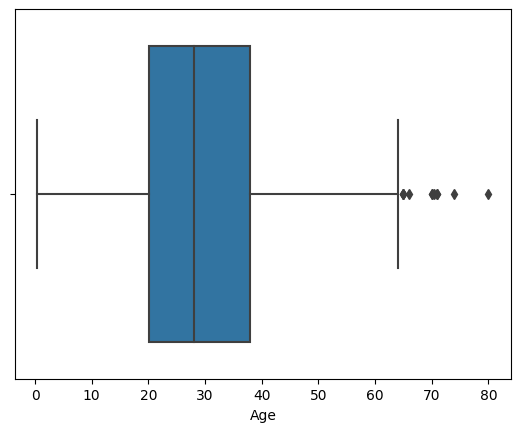

In [19]:
sns.boxplot(df, x='Age')